# <center> Exploratory Data Analysis </center>
## <center> 3$^{rd}$ Assignment - 2$^{nd}$ Notebook </center>
### <center> By Group 80 for the course Advances in Data Mining of the University of Leiden taught by Wojtek Kowalczyk </center>
<center> Lisa Dombrovskij (s1504819) - dombrovskij@strw.leidenuniv.nl </center>
<center> Margherita Grespan (s2233150) - grespan@strw.leidenuniv.nl </center>

***

A graph is a system consisting of nodes and edges. Two nodes can be linked together by an edge and this link can be in a specific direction. For example, if we have a node A and a node B and there is a link in the direction from A to B, then A has an outgoing edge and B has an incoming edge. 

The data used for this project is compiled by Cristian Consonni, David Laniado, & Alberto Montresor (2019) and can be found [here](https://zenodo.org/record/2539424#.Xa2dvJMzZ-U). It consists of four columns showing links between pages on Wikipedia. It shows the title of the page and the page it links to, along with a unique ID for each page. The dataset now spans over 17 years, and each year a snapshot is taken of Wikipedia's link network. 

This link network is a graph, in which the nodes are pages and the edges are links between the pages. 

The probability of going from one page to the other can be represented by a transition matrix M.

$$M = \begin{bmatrix} \frac{1}{2} & 0 & \frac{1}{2} \\ 0 & \frac{1}{2} & \frac{1}{4} \\ \frac{1}{2} & \frac{1}{2} & \frac{1}{4} \end{bmatrix}$$

In this case there are three nodes. Each column X lists the probability of going to Y. For example, say we have columns A, B and C and rows A, B and C, then the probability of going from node B to node C is $\frac{1}{2}$.

A graph can contain interesting systems, such as spider traps. This means that there is a probability of staying at the same node, this is a place you can get 'stuck' in. In the example transition matrix above, one can see a spider trap when going from A to A, for example.

Another thing a graph can have is a dead end. This means that a node has incoming edges, but no outgoing edges, so once one gets to that node, it will stay there forever. 

To find the probabilities of ending up at each node, we use a vector v. This vector is initiated as follows:

$$ v = \begin{pmatrix} \frac{1}{3} \\ \frac{1}{3} \\ \frac{1}{3} \end{pmatrix}$$.

We can then iterate the multiplication Mv to find the eventual vector v. If the graph is strongle connected, i.e. there is a path between any two nodes and there are no dead ends, then the sequence v, Mv, M(Mv), ... converges to v' such that v' is the principal eigen vector of matrix M. 

## Exploratory Work

In this notebook some exploratory work is done on the dataset.

We will look at:

- __Dead ends__: How many notes are there without any outgoing edges?
- __Distribution of in-degrees__: What is the number of incoming edges for every node?
- __Distribution of out-degrees__: What is the number of outgoing edges for every node?

We will also calculate the average in-degree and out-degree of the graph.

In [10]:
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import seaborn as sns


In [11]:
#Load in the dataset
with open('prepared_data', 'rb') as f:
    data = pickle.load(f)

In [12]:
data.head()

,new_page_id_from,new_page_id_to
0,0,18381
1,0,19179
2,0,18382
3,0,18501
4,0,18502


As can be seen in the 'prep' notebook, the dataset consists of two columns: 'new_page_id_from' and 'new_page_id_to'. Every row is a link between two pages, denoted by their ID's.

In [13]:
n_nodes = len(pd.unique(data[['new_page_id_from', 'new_page_id_to']].values.ravel('K')))
print("Total amount of unique ID's/pages/nodes in the dataset: {}".format(n_nodes))

Total amount of unique ID's/pages/nodes in the dataset: 248193


Nodes without outgoing edges will only have links to them, but will not link to any page. This means that they can be found in the 'new_page_id_to' column, but not in the 'new_page_id_to' column.

In [14]:
#This extracts the unique IDs that can be found in the new_page_id_to column but not in new_page_id_from
nodes_no_outgoing_edges = data.loc[~data.new_page_id_to.isin(data.new_page_id_from)].new_page_id_to.unique()

In [15]:
n_no_outgoing = len(nodes_no_outgoing_edges) #amount of nodes without outgoing edges
print("Number of unique nodes without outgoing edges: {}".format(n_no_outgoing))

Number of unique nodes without outgoing edges: 17369


For each node we can count the amount of incoming edges by counting how many times the node occurs in the 'new_page_id_to' column. 

In [16]:
n_incoming_count = data.groupby('new_page_id_to').size().reset_index(name = 'n_incoming') #Count n_incoming per node

In [17]:
temp = pd.DataFrame({'page_id':np.arange(n_nodes)}) #Temporary dataframe containing all IDs

In [18]:
#n_incoming_count only contains ID's that have incoming edges
#Merge the temporary dataframe with the n_incoming count to have all IDs in the table
n_incoming = pd.merge(temp, n_incoming_count, left_on = 'page_id', right_on = 'new_page_id_to', how='outer').fillna(0)
n_incoming.drop(columns = ['new_page_id_to'], inplace=True)

In [19]:
n_incoming.head()

,page_id,n_incoming
0,0,210.0
1,1,55.0
2,2,90.0
3,3,98.0
4,4,430.0


The first five entries in the n_incoming table are shown above. It shows every page ID in the page_id column and then amount of incoming edges per page ID in the n_incoming column. 

In [20]:
#Count n_outgoing
n_outgoing_count = data.groupby('new_page_id_from').size().reset_index(name = 'n_outgoing')

In [21]:
#n_outgoing_count only contains ID's that have outgoing edges
#Merge the temporary dataframe with the n_outgoing count to have all IDs in the table
n_outgoing = pd.merge(temp, n_outgoing_count, left_on = 'page_id', right_on = 'new_page_id_from', how='outer').fillna(0)
n_outgoing.drop(columns = ['new_page_id_from'], inplace=True)

In [22]:
n_outgoing.head()

,page_id,n_outgoing
0,0,193.0
1,1,21.0
2,2,22.0
3,3,61.0
4,4,47.0


The same can be done for the number of outgoing edges. The first five entries in the n_outgoing table are shown above. It shows every page ID in the page_id column and then amount of outgoing edges per page ID in the n_outgoing column. 

To be able to visualize the distributions of n_incoming and n_outgoing edges made above, we will count the number of nodes for each n_incoming and n_outgoing respectively. This way we can see how many nodes have how many incoming or outgoing edges.

In [23]:
nodes_per_incoming = n_incoming.groupby('n_incoming').size().reset_index(name = 'n_nodes')
nodes_per_incoming.n_incoming = nodes_per_incoming.n_incoming.astype(int)

In [24]:
n_incoming.head()

,page_id,n_incoming
0,0,210.0
1,1,55.0
2,2,90.0
3,3,98.0
4,4,430.0


The easiest first step is to look at the histogram distribution of this table.

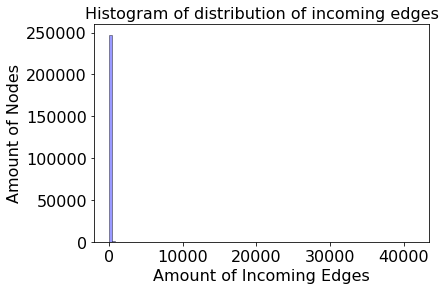

In [25]:
# seaborn histogram
sns.distplot(n_incoming['n_incoming'], hist=True, kde=False, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of distribution of incoming edges', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Amount of Incoming Edges', fontsize=16)
plt.ylabel('Amount of Nodes', fontsize=16);

It is clear that the distribution of incoming edges is very concentrated at the low end, but apparently there are small amounts of nodes that have tenthousands of incoming edges. We can look at the quantiles to see how concentrated the distribution is towards the low ends. 

In [26]:
n_incoming['n_incoming'].describe()

count    248193.000000
mean         12.774792
std         238.852827
min           0.000000
25%           1.000000
50%           2.000000
75%           6.000000
max       41371.000000
Name: n_incoming, dtype: float64

The 75% quantile is at 6 incoming edges that means that 75% of the datapoints lie below this number. The maximum of incoming edges, however, is 41371 edges, which means that 25% of the data is distributed between 6 and 41371. This is why the histogram looks the way it does. Most nodes have below 6 incoming edges, but there are huge outliers that have up to 41371 incoming edges. To maybe see a bit more of the distribution, we can zoom in on only the first three quantiles.

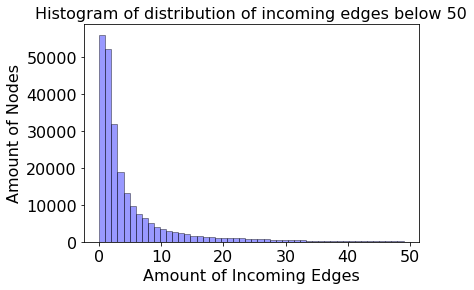

In [27]:
# seaborn histogram
sns.distplot(n_incoming.loc[n_incoming.n_incoming < 50]['n_incoming'], hist=True, kde=False, 
             bins=50, color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of distribution of incoming edges below 50', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Amount of Incoming Edges', fontsize=16)
plt.ylabel('Amount of Nodes', fontsize=16);

A lot of nodes have either 0 incoming edges or 1 incoming edge. Then the distribution quickly declines.

Now let's have a look at the distribution of outgoing edges.

In [28]:
n_outgoing.head()

,page_id,n_outgoing
0,0,193.0
1,1,21.0
2,2,22.0
3,3,61.0
4,4,47.0


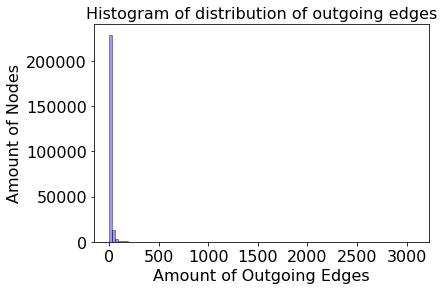

In [29]:
# seaborn histogram
sns.distplot(n_outgoing['n_outgoing'], hist=True, kde=False, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of distribution of outgoing edges', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Amount of Outgoing Edges', fontsize=16)
plt.ylabel('Amount of Nodes', fontsize=16);

The same concentration at lower ends is happening in the outgoing edges distribution as we saw in the incoming edges distribution. However, these numbers are much less spread out. Where the distribution of incoming edges extended to over 40000 number of incoming edges, the number of outgoing edges is only spread out up to 3000. We can again look at the quantiles.

In [30]:
n_outgoing['n_outgoing'].describe()

count    248193.000000
mean         12.774792
std          23.416633
min           0.000000
25%           3.000000
50%           9.000000
75%          14.000000
max        3072.000000
Name: n_outgoing, dtype: float64

The shape of the distribution is quite similar to the previous distribution we looked at. Of the nodes, 75% have 14 or less outgoing edges, but 25% of the nodes have between 14 and 3072 edges. We zoom in to the first three quantiles again.

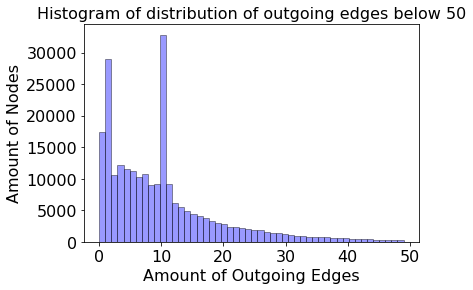

In [31]:
# seaborn histogram
sns.distplot(n_outgoing.loc[n_outgoing.n_outgoing < 50]['n_outgoing'], hist=True, kde=False, 
             bins=50, color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of distribution of outgoing edges below 50', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Amount of Outgoing Edges', fontsize=16)
plt.ylabel('Amount of Nodes', fontsize=16);

An interesting effect becomes visible when we zoom in to look only at nodes that have below 50 outgoing edges. There are more nodes that have 1 outgoing edge than 0, but an even bigger amount of nodes have exactly 10 outgoing edges. The fact that there are more nodes that have 1 outgoing edge than 0 might not be too surprising, as we can imagine most Wikipedia pages to refer to at least one other page, but we cannot think of a sensible reason why there would be a peak at 10 outgoing edges.

In [32]:
average_in_degree = n_incoming.n_incoming.mean() #Calculate average n_incoming
average_out_degree = n_outgoing.n_outgoing.mean() #Calculate average n_outgoing

In [33]:
print("Average in-degree of graph: {}".format(round(average_in_degree,2)))
print("Average out-degree of graph: {}".format(round(average_out_degree,2)))

Average in-degree of graph: 12.77
Average out-degree of graph: 12.77


The average in-degree and out-degree of the graph are of course the same, because if nodes have an average of 12.77 outgoing edges then nodes should have an average of 12.77 incoming edges.

## Memory Estimations

Throughout the next two notebooks, different ways are used to obtain vector v, the principal eigen vector of transition matrix M. 
We will now do some calculations for memory usage of those methods. We want to know how much memory we need to store the transition matrix and vector v fully, and with the transition matrix as a sparse matrix. We also want to know how much memory it will take to store it in a different format table, containing three columns: source node, degree and destination nodes. In which source node contains the ID of a source node, degree contains a number that tells you to how many nodes the source node is connected and destination nodes contains all of the ID's of the nodes to which the source node is connected. An example of such a table is shown below.

| Source Node | Degree   | Destination Nodes |
|------|------|------|
|   2  | 3| 10,102,220 |
|   8  | 2| 15, 1001 |
|   ..  | .. | ..|

#### Full Transition Matrix and v

The number of elements in the transition matrix M, as the shape is n_nodes by $n_{nodes}$ with $n_{nodes}$ being the total number of nodes, is $n_{nodes}^2$.
The number of elements in vector v is $n_{nodes}$, so the total number of elements is:

$ \#elements = n_{nodes}^2 + n_{nodes}$

We store these numbers with double precision, so 64 bits per number. 1 bit is $1.25 * 10^{-10}$GB. To obtain the amount of gigabytes the equation is:

$total GB = \#elements * 64 * 1.25 * 10^{-10}$

In [34]:
#Estimation of memory

#Number entries in Transition Matrix M = number of nodes * number of nodes
elements_in_M = n_nodes**2
#Number of entries in v = n_nodes
total_amount_numbers = elements_in_M + n_nodes
#Double precision so number = 64 bits
total_bits = total_amount_numbers * 64
#1 bit = 1.25 × 10-10 gigabytes
total_GB = total_bits * 1.25*10**-10
print("Total RAM needed to store the transtion matrix M and initial vector v: {}GB".format(round(total_GB,2)))

Total RAM needed to store the transtion matrix M and initial vector v: 492.8GB


#### Sparse Transition Matrix and v

Now if we make transition matrix M a sparse matrix, we only have to store the non-zero elements. The number of non-zero elements in the sparse matrix is equal to the total number of links in the dataset. The rest of the memory calculation is the same as above.

In [35]:
#If M sparse, then no zeros stored
#Number entries in sparse M = number of non zero elements = number of unique existing links
elements_in_sparse_M = len(data)

In [36]:
print("As a comparison:")
print("Total number of elements in M: {}".format(elements_in_M))
print("Total number of elements in sparse M: {}".format(elements_in_sparse_M))

As a comparison:
Total number of elements in M: 61599765249
Total number of elements in sparse M: 3170614


In [37]:
# total_amount_numbers_sparse = elements_in_sparse_M + n_nodes
#Double precision so number = 64 bits
total_bits_sparse = elements_in_sparse_M * 64 + n_nodes * 64
#1 bit = 1.25 × 10-10 gigabytes
total_GB_sparse = total_bits_sparse * 1.25*10**-10
print("RAM needed to store sparse transition matrix and full initial vector v: {}GB".format(round(total_GB_sparse,2)))
#1 bit = 1.25 × 10-7 megabytes
total_MB_sparse = total_bits_sparse * 1.25*10**-7
print("which is {}MB".format(round(total_MB_sparse,2)))

RAM needed to store sparse transition matrix and full initial vector v: 0.03GB
which is 27.35MB


#### Table Format

| Source Node | Degree   | Destination Nodes |
|------|------|------|
|   2  | 3| 10,102,220 |
|   8  | 2| 15, 1001 |
|   ..  | .. | ..|

For the last table the number of elements equals twice (because that is for the source node column and the degree column) the number of source nodes, so nodes with outgoing edges plus the total number of links (because that equals the amount of numbers in the destination node column). 

In [38]:
#Structure as on slide 17
#Source node -- Degree -- Destination nodes
#Source node column amount of numbers = amount of source nodes 
#Degree amount of numbers = amount of source nodes 
#Destination nodes amount of numbers = total number of links

total_amount_numbers_structure = data.new_page_id_from.nunique() + data.new_page_id_from.nunique() + len(data)

#Double precision so number = 64 bits
total_bits_structure = total_amount_numbers_structure * 64
#1 bit = 1.25 × 10-10 gigabytes
total_GB_structure = total_bits_structure * 1.25*10**-10
print("RAM needed to store table format: {}GB".format(round(total_GB_structure,2)))
#1 bit = 1.25 × 10-7 megabytes
total_MB_structure = total_bits_structure * 1.25*10**-7
print("which is {}MB".format(round(total_MB_structure,2)))

RAM needed to store table format: 0.03GB
which is 29.06MB
